In [1]:
######################################################
# Title: Historical Crop Prices Analysis
# In this project, We will be analyzing the historical crop prices in the province of Manitoba, Canada.
# We will be using the data from the Government of Canada's open data website.
# The data is from 1988-2022.
# We will be using the data to analyze the trends in crop prices over the years from 1988 - 2022


# first step is to import the necessary libraries for creating data frames and visualizing the data:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import klib
import seaborn as sns 
import plotly.express as px
import plotly.graph_objects as go


# Read in the data:
# The first dataset is the crop prices in Manitoba from 1988-2022
# The second dataset is the CPI in the province of Manitoba from 2003-2022

url = "https://raw.githubusercontent.com/TheSlayerr/Manitoba_Crop_Prices/main/manitoba-markets-crops-prices-monthly.csv"
df = pd.read_csv('https://raw.githubusercontent.com/TheSlayerr/Manitoba_Crop_Prices/main/manitoba-markets-crops-prices-monthly.csv')
url = "https://raw.githubusercontent.com/TheSlayerr/Manitoba_Crop_Prices/main/Canada%20CPI%202003-2022.csv"
data = pd.read_csv(url)
fert = pd.read_csv('https://raw.githubusercontent.com/TheSlayerr/Manitoba_Crop_Prices/main/Fertilizer%20Price%20from%202019%20-%202023.csv')
urea = pd.read_csv('https://raw.githubusercontent.com/TheSlayerr/Manitoba_Crop_Prices/main/Urea%20Price%202019-2023.csv')
SP500 = pd.read_csv('https://raw.githubusercontent.com/TheSlayerr/Manitoba_Crop_Prices/main/S%5E0P%20500%20Fertilizers%20%5E0%20Agriculture%20Chemicals%20Index.csv')
print(df.head())
print(df.tail())
df.shape
df.info()
df.describe()




   Year  Month        UOM                      Crop     Value  \
0  1988      1  CAD/tonne              Barley, #1CW   51.0000   
1  1988      1  CAD/tonne  Canola Meal, 34%, Altona  226.8425   
2  1988      1  CAD/tonne              Canola, #1CR  260.3450   
3  1988      1  CAD/tonne            Flaxseed, #1CW  186.4750   
4  1988      1  CAD/tonne                Oats, #2CW   87.1125   

                                  Indicator  
0  Farmer's net cash return at Wpg elevator  
1  Farmer's net cash return at Wpg elevator  
2  Farmer's net cash return at Wpg elevator  
3  Farmer's net cash return at Wpg elevator  
4  Farmer's net cash return at Wpg elevator  
      Year  Month        UOM                               Crop      Value  \
4318  2022     12  CAD/tonne                  Soymeal, 46%, Wpg        NaN   
4319  2022     12  CAD/tonne           Wheat, Northern Hard Red  422.73972   
4320  2022     12  CAD/tonne                  Wheat, Red Winter  412.45140   
4321  2022     12  CA

,Year,Month,Value
count,4323.000000,4323.000000,4234.000000
mean,2006.953967,6.519084,254.891314
std,9.779710,3.455179,154.319015
min,1988.000000,1.000000,21.826000
25%,1999.000000,4.000000,145.291667
50%,2008.000000,7.000000,220.544500
75%,2015.000000,10.000000,335.099000
max,2022.000000,12.000000,1429.845760


In [3]:
#We now try to look athe the missing values in the dataset and try to remove them
missing = df.isnull().sum()
print(missing)
df = df.dropna()

Year          0
Month         0
UOM           0
Crop          0
Value        89
Indicator     0
dtype: int64


In [4]:
#We now try to look athe the missing values in the dataset and try to remove them
print(df.isnull().sum())

Year         0
Month        0
UOM          0
Crop         0
Value        0
Indicator    0
dtype: int64


<Axes: title={'center': 'Feature-correlation (pearson)'}>

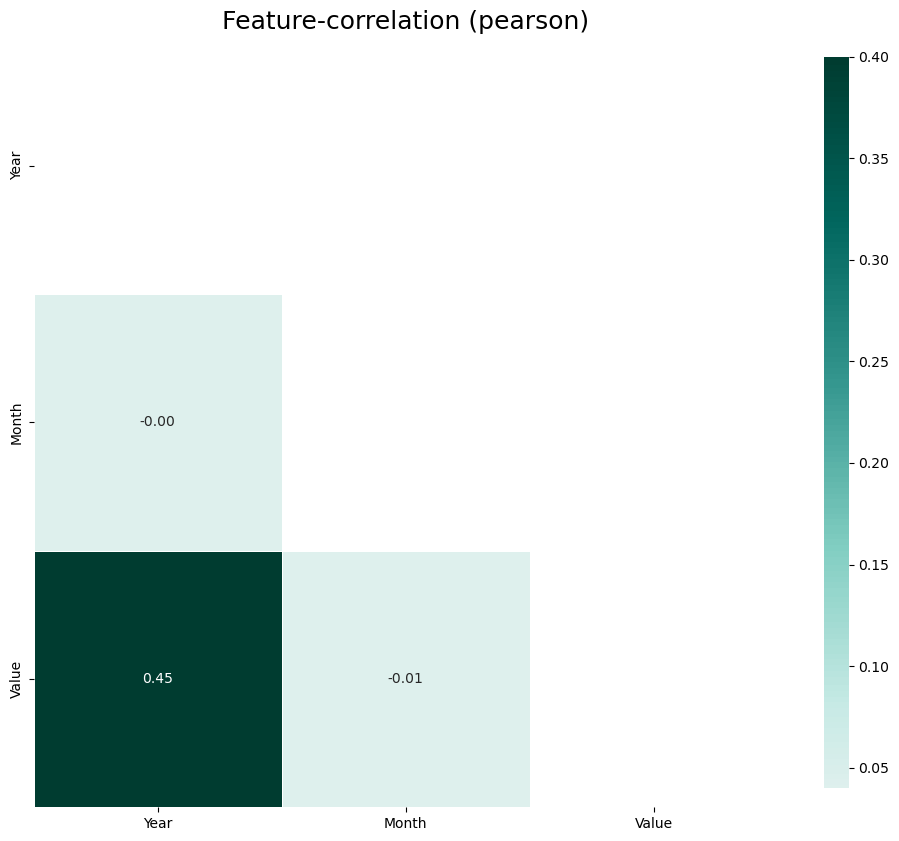

In [5]:
#we use the klib library to plot the correlation matrix
klib.corr_mat(df)
klib.corr_plot(df)

c:\Users\givan\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Axes: xlabel='Year', ylabel='Density'>

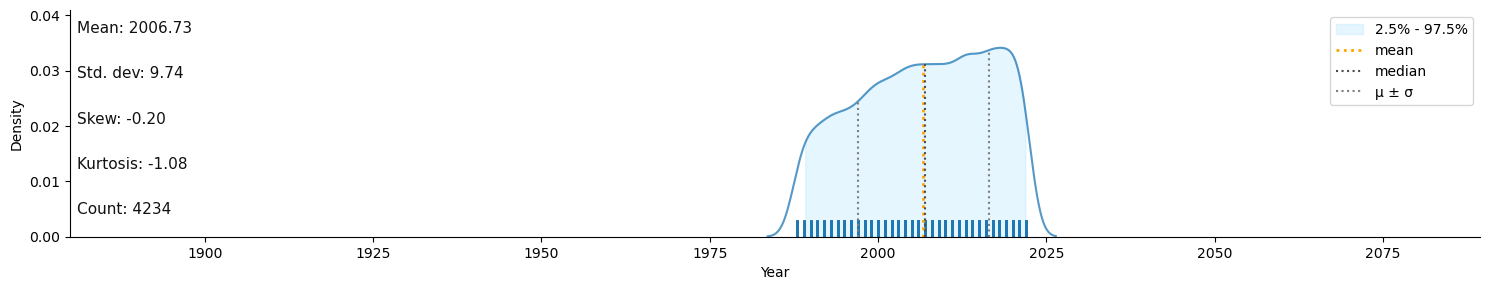

In [7]:

# Filter the dataframe for the desired years (for this dataframe we used 98-2022)
Limited_df = df[(df['Year'] >= 1988) & (df['Year'] <= 2022)]

# Plot the distribution of the data using the klib library and the dist_plot function
klib.dist_plot(Limited_df)


c:\Users\givan\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Axes: xlabel='Value', ylabel='Density'>

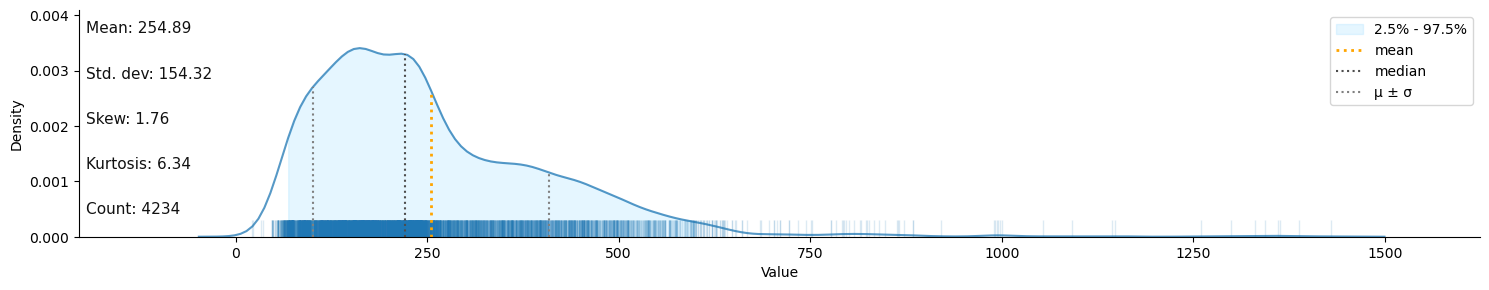

In [8]:
#we now try to plot the distribution of the value of crops through time using the klib library and the dist_plot function
klib.dist_plot(df['Value'])


c:\Users\givan\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


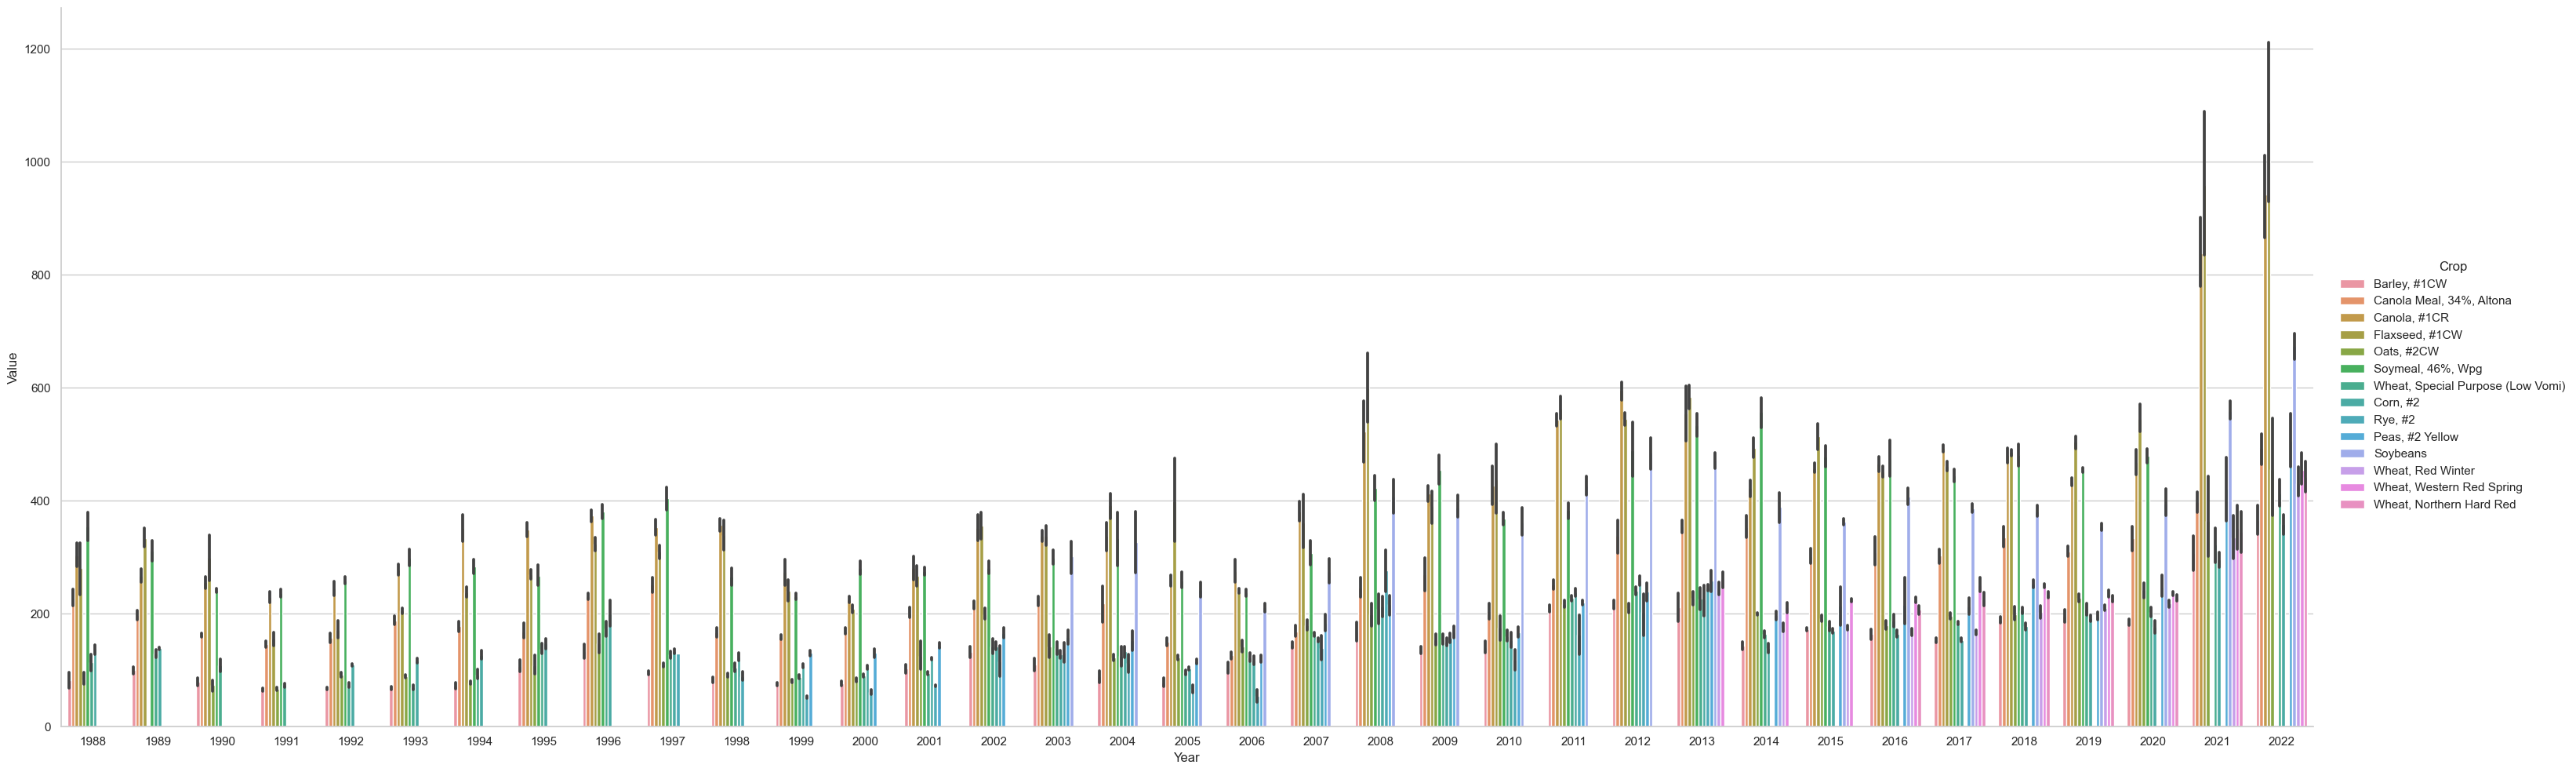

In [9]:
#Plotting the value of crops through time using seaborn. 
#as you can see the value of crops has increased through time
sns.set_theme(style="whitegrid")
plot = sns.catplot(x="Year", y="Value", hue="Crop", kind="bar", data=df, height=10, aspect=3)

c:\Users\givan\anaconda3\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
c:\Users\givan\anaconda3\Lib\site-packages\numpy\lib\nanfunctions.py:1556: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,
c:\Users\givan\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


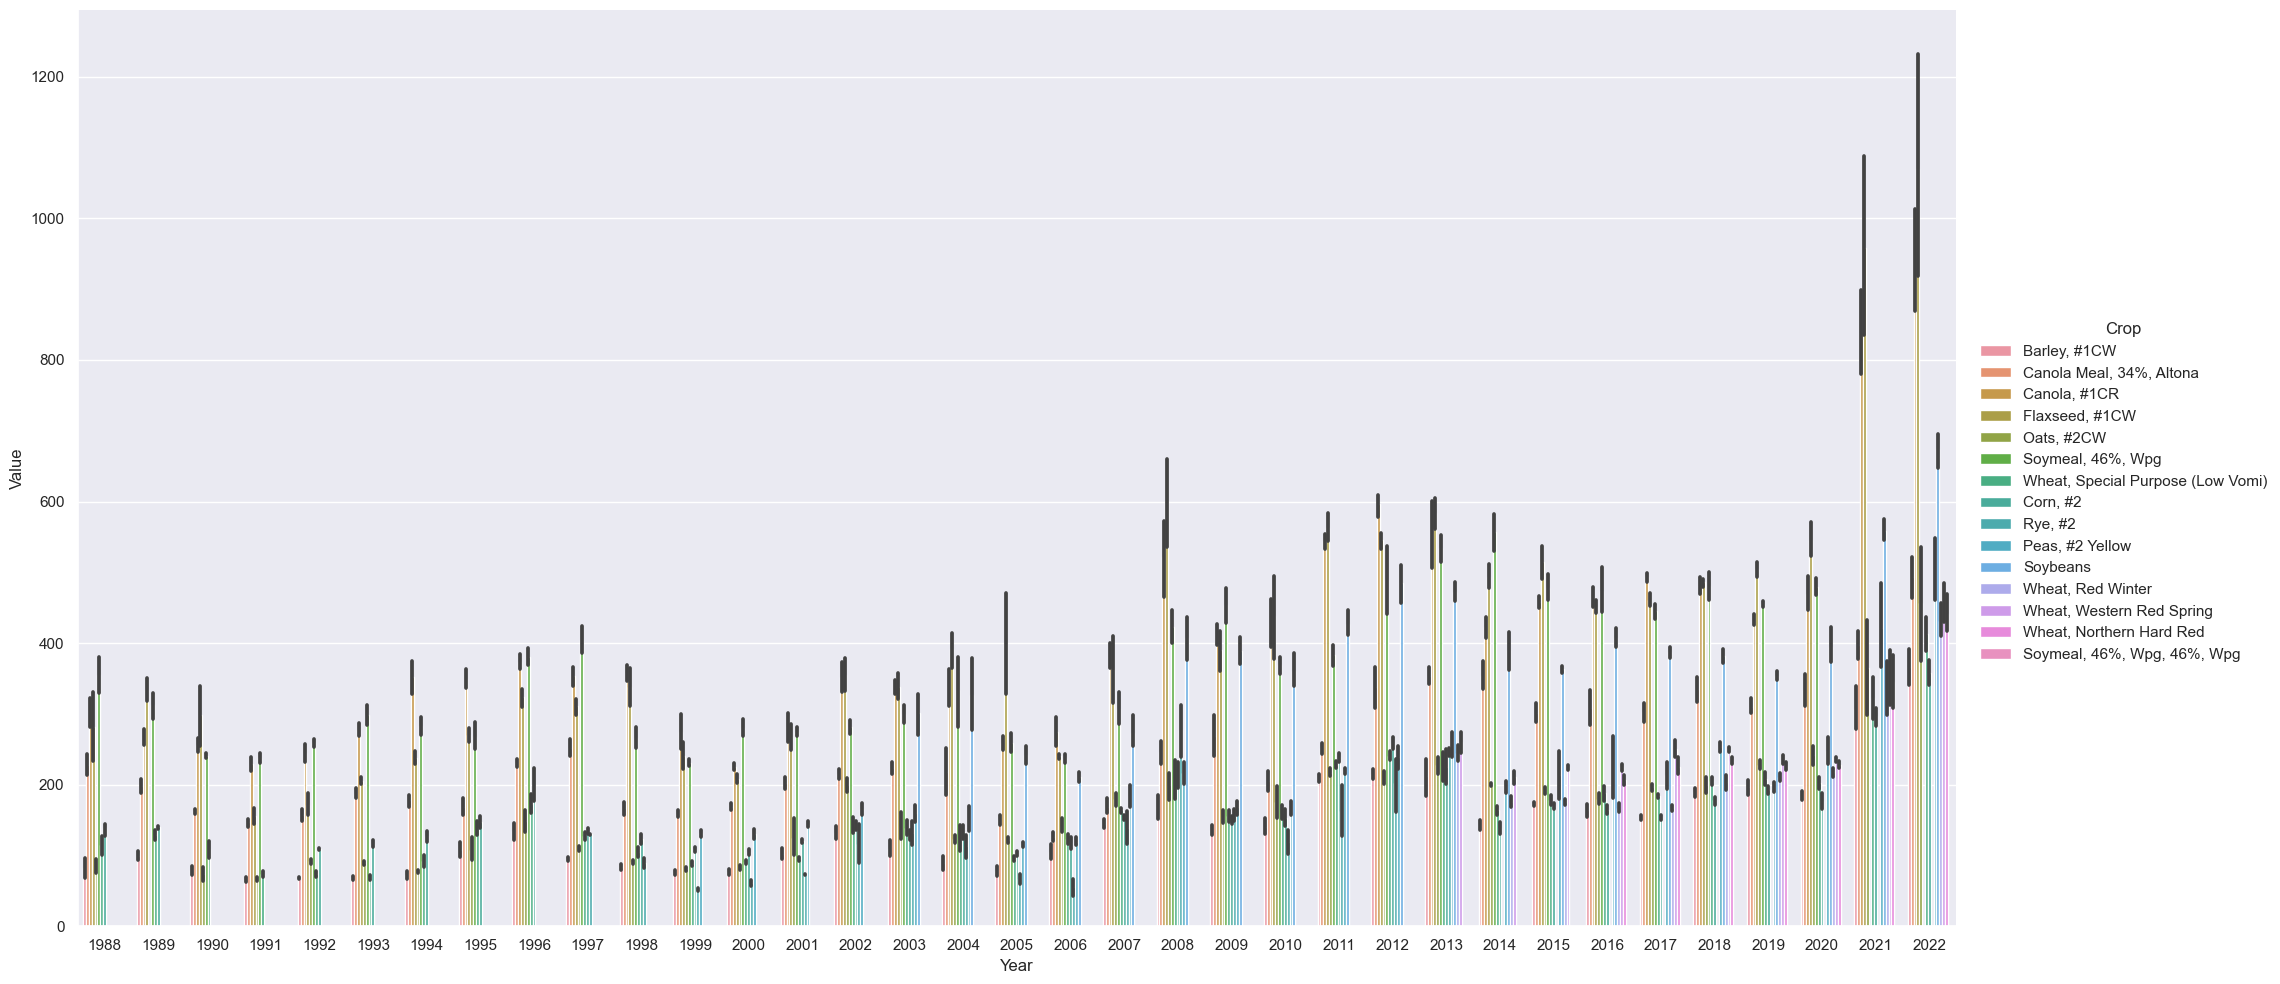

In [7]:
#Plotting the value of crops through time using seaborn. 
#as you can see the value of crops has increased through time
sns.set_theme(style="darkgrid")
plot = sns.catplot(x="Year", y="Value", hue="Crop", kind="bar", data=df, height=10, aspect=2)

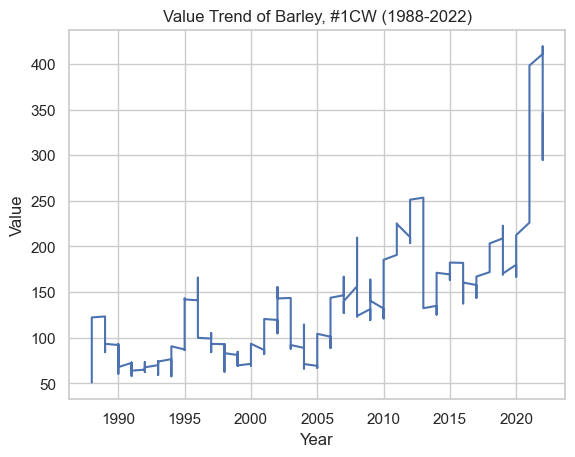

In [10]:
# Filter the dataframe for "Barley, #1CW" and from 1988 to 2022
# In the next step we try to plot the value trend of the all crops from 1988 to 2022
barley_df = df[(df['Crop'] == 'Barley, #1CW') & (df['Year'] >= 1988) & (df['Year'] <= 2022)]

# Plot the value trend
plt.plot(barley_df['Year'], barley_df['Value'])
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Value Trend of Barley, #1CW (1988-2022)')
plt.show()


In [21]:
#Now we use plotly package to plot the value of crops through time from 1988 to 2022
#with this interactive plot we can zoom in and out of the plot and see the values of the crops through time
# Filter the dataframe for the desired years
crop_values_df = df[df['Year'].between(1988, 2022)]

# Create an interactive line plot using plotly package (you can select and deselect the crops from the legend and also zoom in or out of the plot)
fig = px.line(crop_values_df, x='Year', y='Value', color='Crop', title='Crop Values Trend (1988-2022)')
fig.update_layout(width=1000, height=600)
fig.show()


In [12]:
# Group the dataframe by crop and calculate the total value for each crop
crop_value_totals = df.groupby('Crop')['Value'].sum().reset_index()

# Create an interactive pie chart to capture the total of crop values (You can select and deselect the crops from the legend)
fig = px.pie(crop_value_totals, values='Value', names='Crop', title='Crop Value Totals (1988-2022)')
fig.show()


   year  value
0  2003  101.8
1  2004  103.8
2  2005  106.6
3  2006  108.7
4  2007  110.9


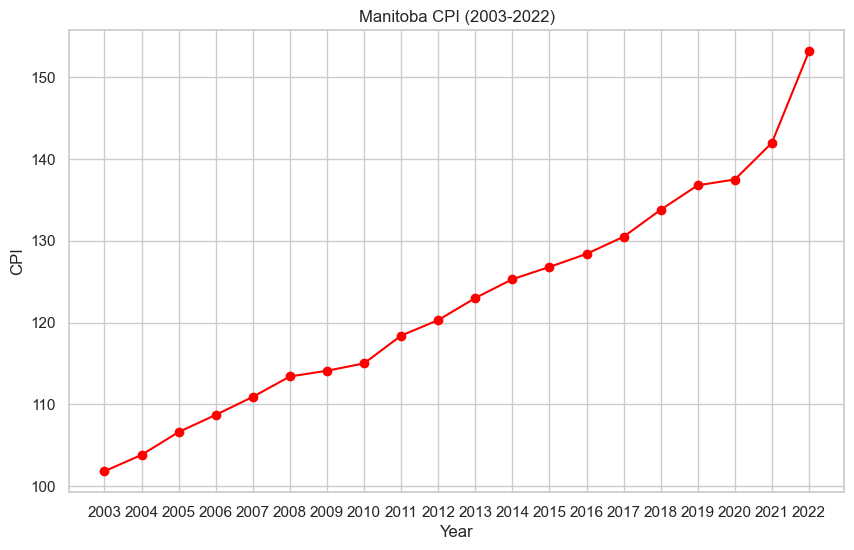

In [13]:

#In the next step after the analyzing crop prices, lets see that what happened to CPI (consumer price index) in the province of Manitoba from 2003 to 2022
url = "https://raw.githubusercontent.com/TheSlayerr/Manitoba_Crop_Prices/main/Canada%20CPI%202003-2022.csv"
data = pd.read_csv(url)

# In the first step we sort the dataframe by year
data.sort_values('year', inplace=True)

# In this step we see the first observable values of the dataset, the dataset is not that large because it only contains the CPI from 2003 to 2022
print(data.head())

# Now we use the common visualizing package to create a line plot to visualize the CPI from 2003 to 2022
plt.figure(figsize=(10, 6))
plt.plot(data['year'], data['value'], color='red', marker='o')
plt.title('Manitoba CPI (2003-2022)')
plt.xlabel('Year')
plt.ylabel('CPI')

# Modify xticks
plt.xticks(np.arange(min(data['year']), max(data['year'])+1, 1.0))

plt.show()


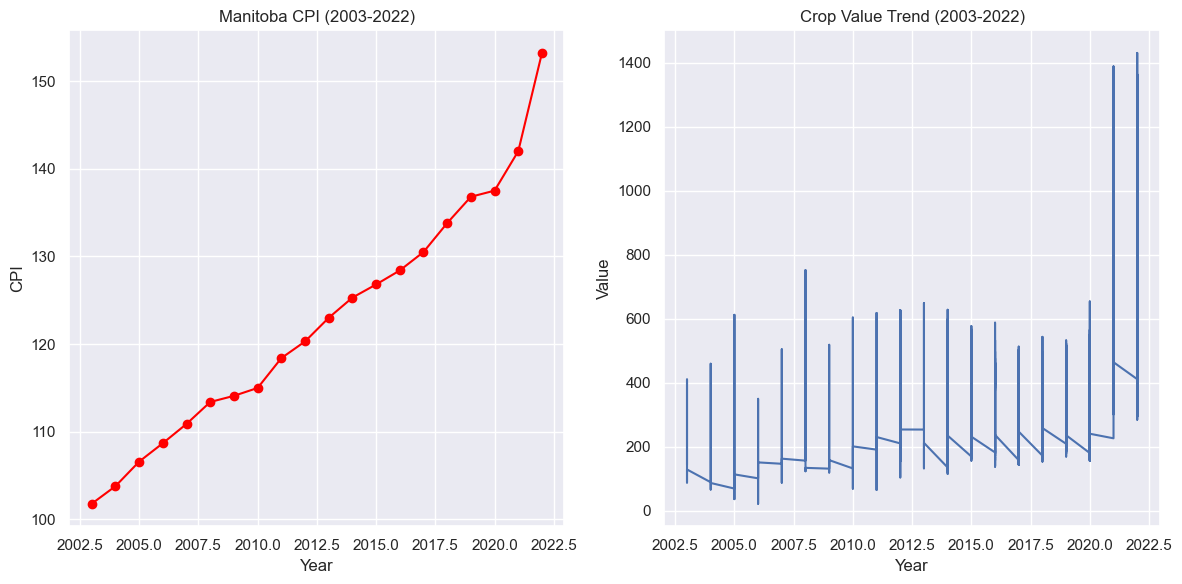

In [24]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Create a line plot for CPI as the first plot in the previous figure
ax1.plot(data['year'], data['value'], color='red', marker='o')
data.sort_values('year', inplace=True)
ax1.set_title('Manitoba CPI (2003-2022)')
ax1.set_xlabel('Year')
ax1.set_ylabel('CPI')

# Plot Crop Value just like the plot in previues section

ax2.plot(crop_values_df[crop_values_df['Year'].between(2003, 2022)]['Year'], crop_values_df[crop_values_df['Year'].between(2003, 2022)]['Value'])
ax2.set_title('Crop Value Trend (2003-2022)')
ax2.set_xlabel('Year')
ax2.set_ylabel('Value')
plt.tight_layout()
plt.show()

######################################################
# As you can see there is a correlation between the consumer index price (CPI) and the value of crops in the province of Manitoba. 
# Throughout the years the value of crops has increased and the CPI has also increased.
######################################################

In [ ]:
######################################################
# In the next step we try to analyze the fertilizer prices in the province of Manitoba from 2019 to 2023
######################################################

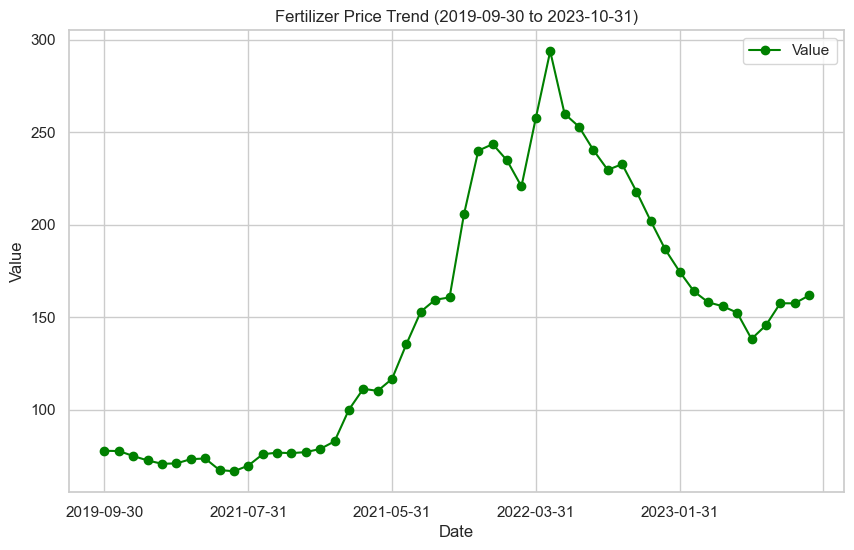

In [46]:

fertilizer_df = fert[::-1]
# Create the dataframe from 2019-2023 to show the trend of fertilizer prices and correlation between the price of fertilizer and the value of crops
fertilizer_df_filtered = fertilizer_df[(fertilizer_df['Date'] >= '2019-09-30') & (fertilizer_df['Date'] <= '2023-10-31')]

# Plot the price trend
fertilizer_df_filtered.plot(x='Date', y='Value', kind='line', marker='o', figsize=(10, 6), color='green')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Fertilizer Price Trend (2019-09-30 to 2023-10-31)')
plt.show()


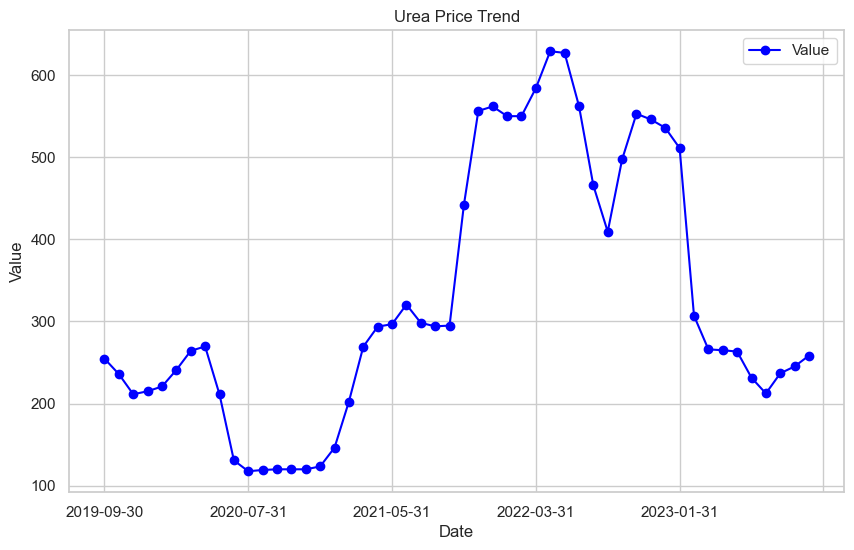

In [50]:
#The urea dataset contains the price of urea from 2019 to 2023
#This price belongs to US Urea Spot Price (Gulf) in the United States.

urea_df = urea[::-1]
urea_df.plot(x='Date', y='Value', kind='line', marker='o', figsize=(10, 6), color='blue')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Urea Price Trend')
plt.show()


In [ ]:

######################################################
#S&P 500 Fertilizers & Agricultural Chemicals Sub-Industry
#The S&P 500 Fertilizers & Agricultural Chemicals Sub-Industry Index is a capitalization-weighted index.
#The index is designed to measure the performance of companies in the sub-industry group of fertilizers and agricultural chemicals.
#The index is unmanaged and can not be driectly purchased by investors or retailers.
#The performance of this index can be influenced by many factors, for instance, the price of fertilizer, the price of crops, food demand, commodity prices, supply chain restrictions 
#and most importantly the geopolitical events.
#In 2021 during the pandemic and the lockdowns, the price of fertilizer has increased and the price of crops has also increased. As it can be seen on the plot below
#We see a ~27% rise in price of fertilizer and a ~20% rise in price of crops in 2021. But most important factor that most of the farmers are not aware of is the geopolitical events.
#The moment that the geopolitical events change, the price of fertilizer and crops will change as well. Because of the Ukraine crisis, 
#the price of fertilizer has increased and the price of crops has also increased.
#This is mainly because the Ukraine is one of the largest producers of crops in the world and the price of crops is directly related to the price of fertilizer.
#Ukraine is ranked 1st in the world for the production of sunflower seeds, 3rd for barley and rapeseed, 4th for rye and soybeans, 5th for wheat and corn, and 8th for oats. 
#and also Ukraine is the world's largest exporter of sunflower oil, the 3rd largest exporter of corn, the 4th largest exporter of wheat, and the 7th largest exporter of soybeans.
######################################################


In [31]:

#First we create a new dataframe that covers the date of the S&P 500 Fertilizers & Agricultural Chemicals Sub-Industry Index from 2021-01-04 to 2023-11-20
SP500_New = SP500[(SP500['Date'] >= '2019-09-30') & (SP500['Date'] <= '2023-10-31')]

# Create the candlestick chart using plotly package
fig = go.Figure(data=[go.Candlestick(x=SP500_New['Date'],
                open=SP500_New['Open'],
                high=SP500_New['High'],
                low=SP500_New['Low'],
                close=SP500_New['Close'])])

# Update the layout of plot with information about the chart and make it interactive (There is a slide on botton to limit the data to a specific date range)
fig.update_layout(title='S&P 500 Fertilizers & Agricultural Chemicals Sub-Industry Index',title_x=0.5,
                  xaxis_title='Date',
                  yaxis_title='Price',
                  xaxis_rangeslider_visible=True)
fig.update_layout(width=800, height=400)
fig.show()


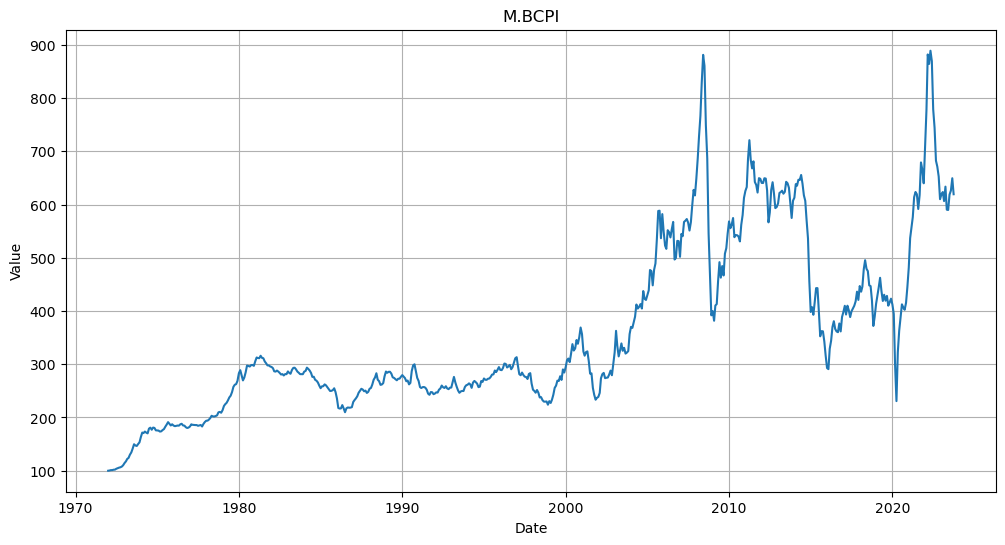

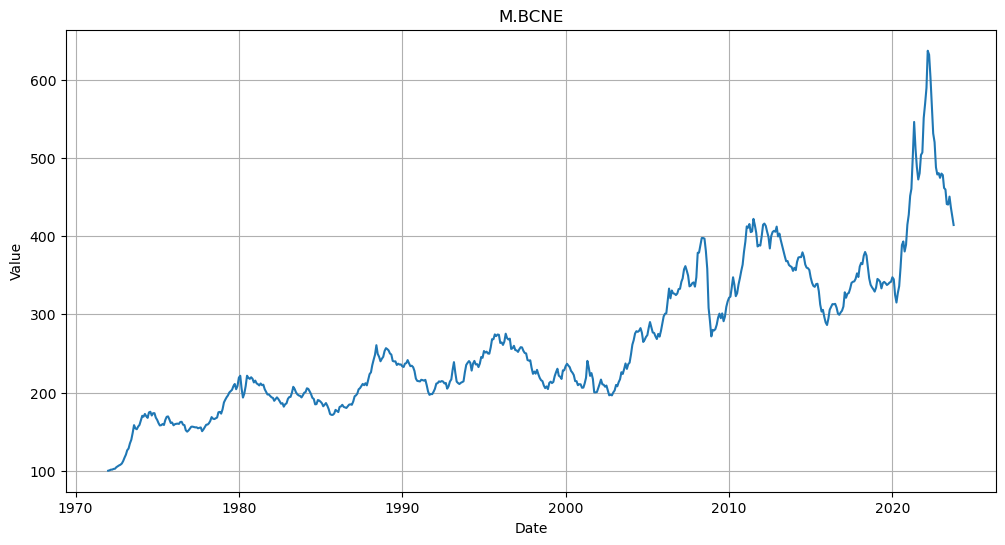

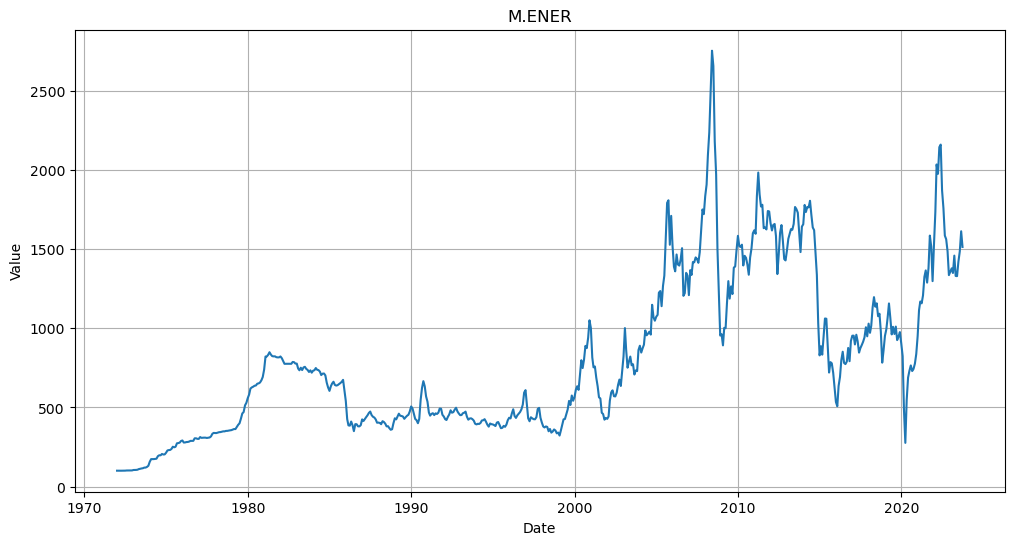

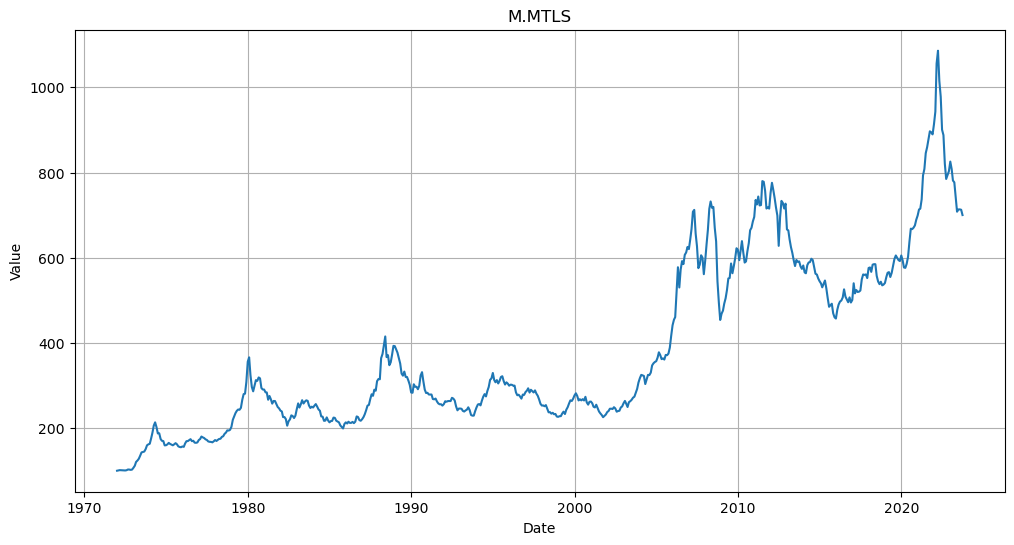

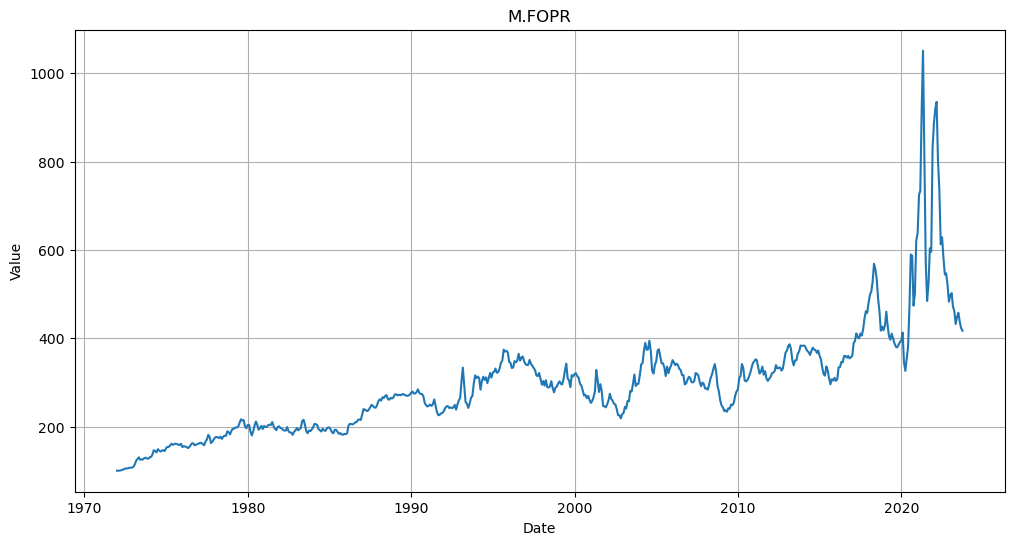

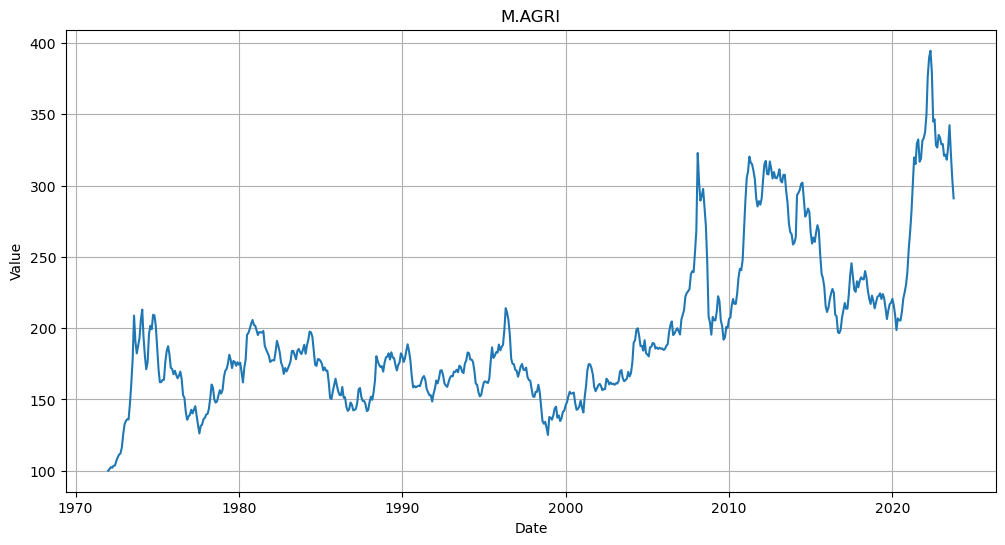

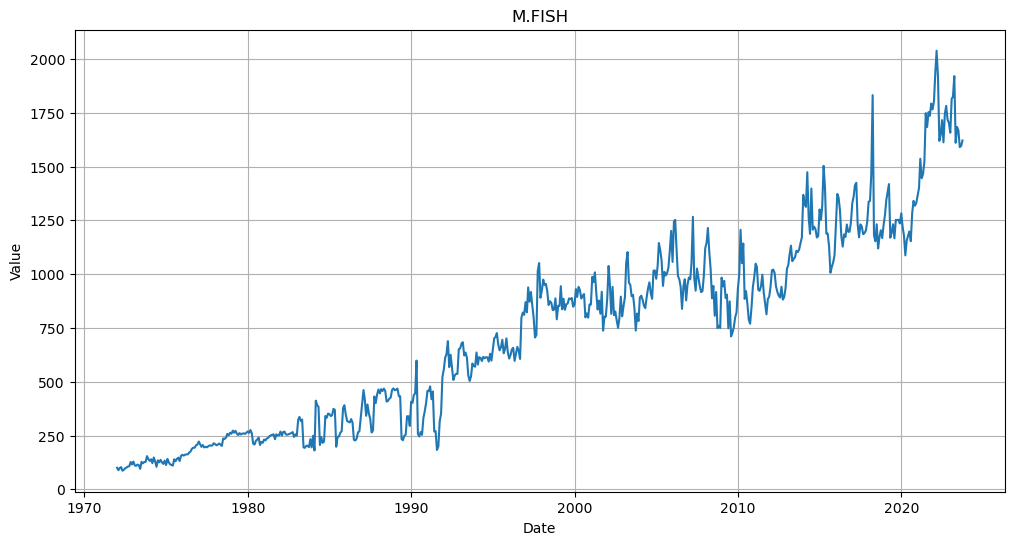

In [27]:
################################################
# M.BCPI	Monthly BCPI Total - v52673496	Monthly Bank of Canada commodity price index - Total
# M.BCNE	Monthly BCPI Excluding Energy - v52673497	Monthly Bank of Canada commodity price index - Excluding Energy
# M.ENER	Monthly BCPI Energy - v52673498	Monthly Bank of Canada commodity price index - Energy
# M.MTLS	Monthly BCPI Metals and Minerals - v52673499	Monthly Bank of Canada commodity price index - Metals and Minerals
# M.FOPR	Monthly BCPI Forestry - v52673502	Monthly Bank of Canada commodity price index - Forestry
# M.AGRI	Monthly BCPI Agriculture - v52673500	Monthly Bank of Canada commodity price index - Agriculture
# M.FISH	Monthly BCPI Fish - v52673501	Monthly Bank of Canada commodity price index - Fish
################################################
url = 'https://raw.githubusercontent.com/TheSlayerr/Manitoba_Crop_Prices/main/Canada%20BCPI%20Monthly%201972-2023.csv'
BCPI = pd.read_csv(url)

BCPI['date'] = pd.to_datetime(BCPI['date'])

BCPI.set_index('date', inplace=True)
for column in BCPI.columns:
    plt.figure(figsize=(12, 6))
    plt.plot(BCPI.index, BCPI[column])
    plt.title(column)
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.grid(True)
    plt.show()


In [30]:
################################################
# M.BCPI	Monthly BCPI Total - v52673496	Monthly Bank of Canada commodity price index - Total
# M.BCNE	Monthly BCPI Excluding Energy - v52673497	Monthly Bank of Canada commodity price index - Excluding Energy
# M.ENER	Monthly BCPI Energy - v52673498	Monthly Bank of Canada commodity price index - Energy
# M.MTLS	Monthly BCPI Metals and Minerals - v52673499	Monthly Bank of Canada commodity price index - Metals and Minerals
# M.FOPR	Monthly BCPI Forestry - v52673502	Monthly Bank of Canada commodity price index - Forestry
# M.AGRI	Monthly BCPI Agriculture - v52673500	Monthly Bank of Canada commodity price index - Agriculture
# M.FISH	Monthly BCPI Fish - v52673501	Monthly Bank of Canada commodity price index - Fish
################################################

url = 'https://raw.githubusercontent.com/TheSlayerr/Manitoba_Crop_Prices/main/Canada%20BCPI%20Monthly%201972-2023.csv'
CANCPI = pd.read_csv(url)

# Convert the 'Date' column to datetime format
CANCPI['date'] = pd.to_datetime(CANCPI['date'])

# Set 'Date' as the index of the dataframe
CANCPI.set_index('date', inplace=True)

# Melt the dataframe to have columns and values in the same column
CANCPI_melt = CANCPI.reset_index().melt(id_vars='date', var_name='Column', value_name='Value')

# Create the interactive plot
fig = px.line(CANCPI_melt, x='date', y='Value', color='Column')
fig.update_layout(width=800, height=400, title='Monthly Bank of Canada Commodity Price Index (1972-2023)')
fig.show()


In [28]:
##########################################
#V41690973	==> Total CPI	Total CPI
#V41690914	==> Total CPI, (seasonally adjusted)	Total CPI, (seasonally adjusted)
#STATIC_TOTALCPICHANGE	==> Total CPI, Percentage Change over 1 year ago (unadjusted)	Total CPI, Percentage Change over 1 year ago (unadjusted)
#CPI-trim	CPI-trim is a measure of core inflation that excludes CPI components whose rates of change in a given month are located in the tails of the distribution of price changes. 
#CPI-median	CPI-median is a measure of core inflation corresponding to the price change located at the 50th percentile (in terms of the CPI basket weights) of the distribution of price changes in a given month.
#CPI-common	CPI-common
#ATOM_V41693242	==> CPIX, Percentage Change over 1 year ago (unadjusted)	The CPI excluding eight of the most volatile components (fruit, vegetables, gasoline, fuel oil, natural gas, mortgage interest, inter-city transportation and tobacco products) as well as the effect of changes in indirect taxes on the remaining components.
#STATIC_CPIXFET	==> CPI-XFET, Percentage Change over 1 year ago (unadjusted)	The CPI excluding food, energy and the effect of changes in indirect taxes.
#CPIW	CPIW, ==> Percentage Change over 1 year ago (unadjusted)	CPIW adjusts each CPI basket weight by a factor that is inversely proportional to the component's variability and is adjusted to exclude the effect of changes in indirect taxes.
##########################################

url = 'https://raw.githubusercontent.com/TheSlayerr/Manitoba_Crop_Prices/main/CPI_MONTHLY%20-%201995%20-%202023.csv'
df = pd.read_csv(url)

df['date'] = pd.to_datetime(df['date'])

df.set_index('date', inplace=True)
df_melt = df.reset_index().melt(id_vars='date', var_name='Column', value_name='Value')
fig = px.line(df_melt, x='date', y='Value', color='Column')
fig.update_layout(title='Consumer Price Index (1995-2023)',title_x=0.5,width=800, height=400)
fig.show()